In [8]:
from PIL import Image
from os import listdir
import re

# Load the necessary script
%run '../src/EigenSpace.py'
%run '../src/EigenCrossValidation.py'
%run '../src/EigenSplitValidation.py'
pathToImages = '../images/yalefaces/'

In [9]:
# Criar uma lista onde cada element possui um url e um tag, associada a imagem
imagesWithTags = [{"url":(pathToImages + f),"tag": int(re.match('subject([0-9]+).*',f).groups()[0])} for f in listdir(pathToImages)]

# Criar eigenSpace com as imagens acima.
eSpace = EigenSpace(imagesWithTags)


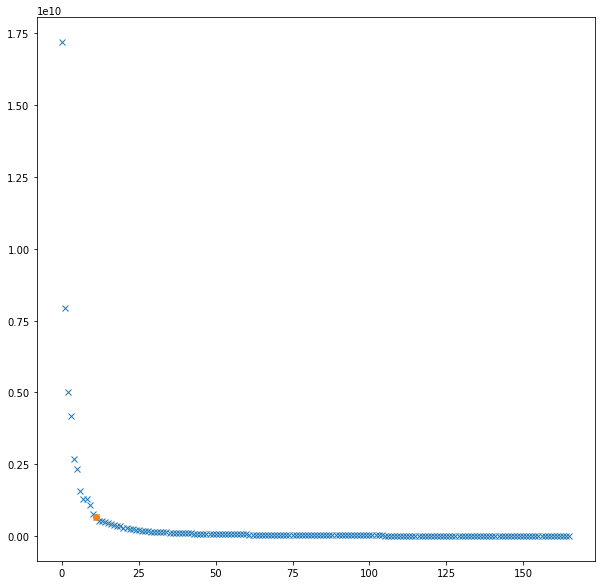

In [10]:
# Criar uma tabela com os valores proprios
eSpace.plotEigenValues()

[None, None, None]

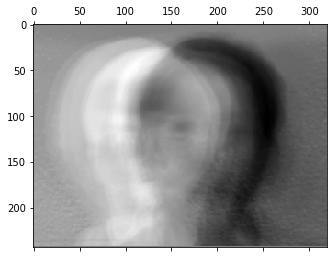

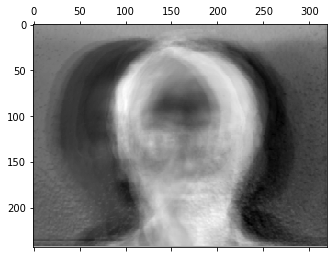

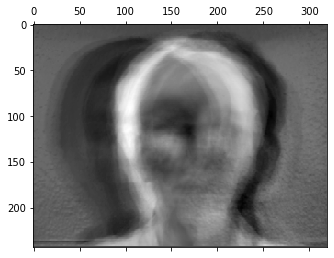

In [11]:
# Mostra as primeiras 3 eigen faces
[ eSpace.plotEigenFace(i) for i in range(0,3) ]

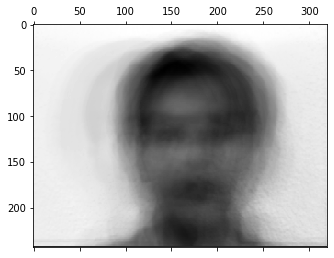

In [12]:
# Para visualizar a cara media podemos utilizar o comando
eSpace.plotAverageFace()

In [13]:
EigenSplitValidation(imagesWithTags,0.7).accuracy()

0.62

In [14]:
EigenCrossValidation(imagesWithTags,10).accuracy()

0.5990950226244344